# Use Python <3.10

This package heavily utilizes the pyMuellerMat package that makes Mueller matrices from "system dictionaries" detailing the instrument configuration. If you want to familiarize yourself with the package beforehand, visit https://github.com/maxwellmb/pyMuellerMat/

In [1]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *

# Step 1: Write FITS Info to CSV

In [2]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

# Step 2 (Optional): Split Up Your Data

In [3]:
# This is specific to what I'm fitting
# I'm going to split the csvs in half because one half has the pickoff in and the other half has it out

# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_no_pickoff = df.iloc[72:].reset_index(drop=True)
    df_with_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
     csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
     split_csv(csv_path)

Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

# Step 3 (Optional): Plot Your Data With the Original Model 

In [4]:
# Define a csv filepath that we just created from whatever wavelength bin you want to visualize
# I have bin zero here, but I would recommend using a bin more in the middle to get a good idea,
# bin zero can be finicky
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin15_no_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[-5.22213279e-01  4.02450338e+08 -3.91877275e-01  4.00912593e+08
 -2.46134292e-02  3.98605969e+08  3.77378452e-01  3.98571117e+08
  5.86235703e-01  4.00370202e+08]
Interleaved Stds
Length:  144
[4.25107378e-05 2.00611649e+04 4.59484896e-05 2.00228018e+04
 5.00721811e-05 1.99651188e+04 4.63858804e-05 1.99642460e+04
 4.04882954e-05 2.00092529e+04]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

In [7]:

# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


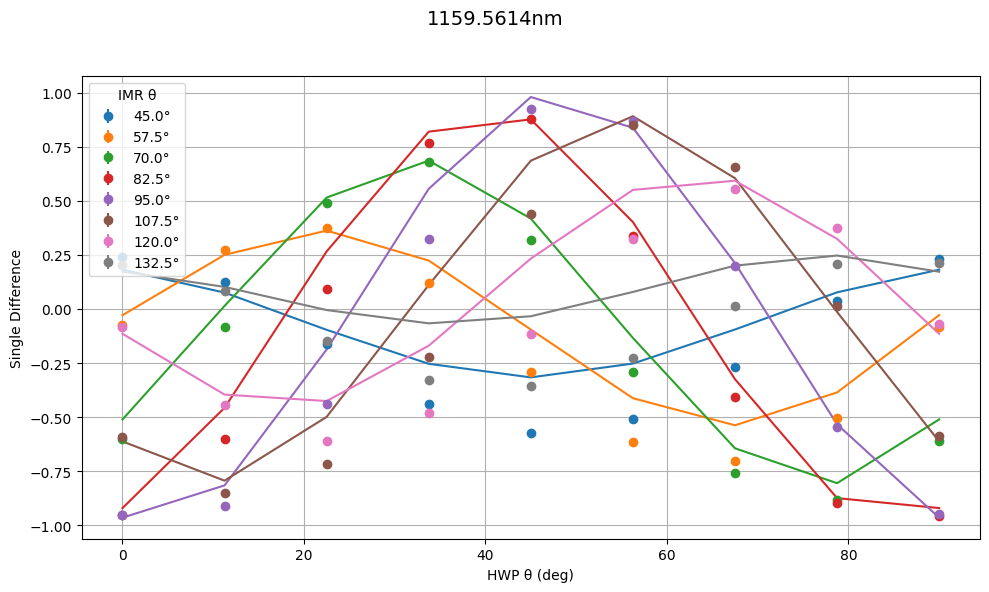

Residuals range: -0.34850937187899333 0.05915823439866466


In [8]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins)[0], IMR_retardance(wavelength_bins)[0]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[0], mode='CHARIS')

# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


# Step 4: Fit New Model

I made a function that does everything quickly but is also tailored to the parameters I am fitting. My function updates the model, puts the pyMuellerMat compatible system dictionary in a JSON file, and optionally saves a plot of the model vs data to a specified path.
If you want to use it for different parameters than the ones detailed in the docstring, 
you'll have to update the function a bit (which shouldn't take too long). 

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.447e+03  2.658e+02 ... -2.018e+03 -1.430e+03]
           x: [ 9.474e-01 -1.062e-02  3.034e+00 -2.200e-03 -3.150e-02]
        cost: 103777034.58373123
         jac: [[ 1.910e+04  5.745e-01 ...  7.206e+01 -7.174e+01]
               [ 1.301e+04  2.233e+02 ...  6.869e+02 -3.739e+02]
               ...
               [ 1.277e+04 -1.792e+02 ... -5.957e+02  2.679e+02]
               [ 1.920e+04  6.071e+01 ...  1.279e+01 -4.252e+01]]
        grad: [-6.520e+08 -5.527e+06 -2.105e+01  8.670e+07 -4.324e+07]
  optimality: 5.848017518002091
 active_mask: [ 1  1  0 -1  1]
        nfev: 8
        njev: 8
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [-1.447e+03  2.658e+02 ... -2.018e+03 -1.430e+03]
           x: [ 9.474e-01 -1.062e-02  3.034e+00 -2.200e-03 -3.150e-02]
        cost: 103777034.58412495
         jac: [[

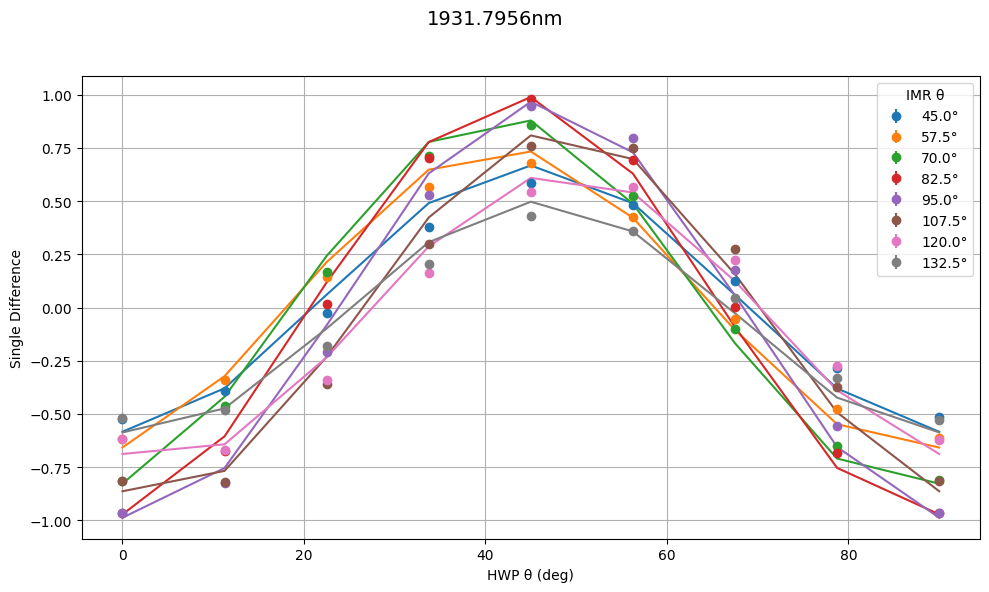

Updated Mueller Matrix:
[[ 0.10326443  0.10326436 -0.00011355  0.        ]
 [-0.10326443 -0.10326436  0.00011355  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12677040860323302 0.11952172154779622
Error: [ 0.02037068  0.77145618  0.02269798  5.03801898 10.04380937]


array([ 0.02037068,  0.77145618,  0.02269798,  5.03801898, 10.04380937])

In [5]:
# Test fitting with the wavelength bin we plotted earlier

fit_CHARIS_Mueller_matrix_by_bin(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff/bin15.json'),
    plot_path=Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff/bin15.png'),)



Looks like our model improved! Note that the Joost't Hart paper used a more elaborate physical model, which I will incorporate later. These fits are a good starting point for more detailed models.

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.036e+02  2.295e+02 ...  4.513e+02  3.611e+02]
           x: [ 4.364e+00 -1.062e-02  3.029e+00 -2.200e-03 -3.150e-02]
        cost: 6375404.431759724
         jac: [[-2.836e+03  2.373e-01 ... -1.132e+01  1.123e+01]
               [-2.016e+03  9.806e+01 ... -6.003e+01  3.508e+01]
               ...
               [-2.115e+03 -7.972e+01 ...  2.131e+01 -5.585e+00]
               [-2.822e+03  2.482e+01 ... -3.582e+01  2.344e+01]]
        grad: [ 1.626e+01 -1.567e+06 -4.801e+01  1.877e+06 -9.510e+05]
  optimality: 13.122118196740521
 active_mask: [ 0  1  0 -1  1]
        nfev: 6
        njev: 6
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.036e+02  2.295e+02 ...  4.513e+02  3.611e+02]
           x: [ 4.364e+00 -1.062e-02  3.029e+00 -2.200e-03 -3.150e-02]
        cost: 6375404.431752609
         jac: [[-2.836e+03  2.373e-

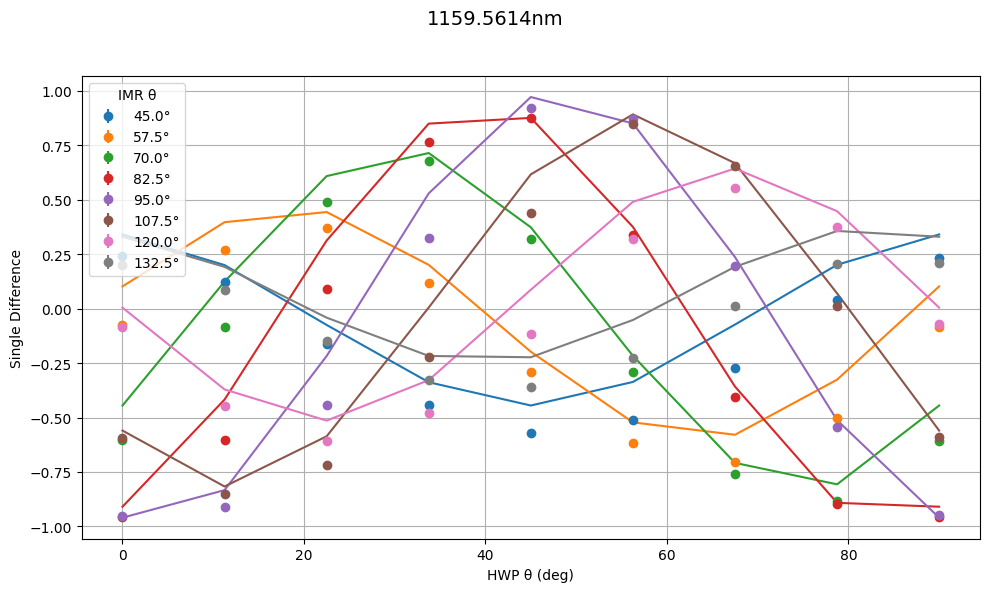

Updated Mueller Matrix:
[[ 0.33262555  0.33262535 -0.00036574  0.        ]
 [-0.33262555 -0.33262535  0.00036574  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.22715909019164643 0.01790874903020334
Error: [ 0.03174771  0.94572774  0.03246671  7.51488291 14.76984533]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 6.036e+01 -9.816e+01 ...  1.511e+02 -1.924e+01]
           x: [ 4.086e+00 -1.062e-02  3.034e+00 -2.200e-03 -3.150e-02]
        cost: 2451955.603055831
         jac: [[-3.016e+03  3.464e-01 ... -1.164e+01  1.149e+01]
               [-2.003e+03  1.311e+02 ... -1.064e+02  5.791e+01]
               ...
               [-2.096e+03 -1.107e+02 ...  6.545e+01 -2.783e+01]
               [-3.022e+03  3.648e+01 ... -4.774e+01  2.952e+01]]
        grad: [ 9.188e-01 -2.414e+06 -7.293e+00  2.555e+06 -1.280e+06]
  optimality: 1.8693601272960692
 

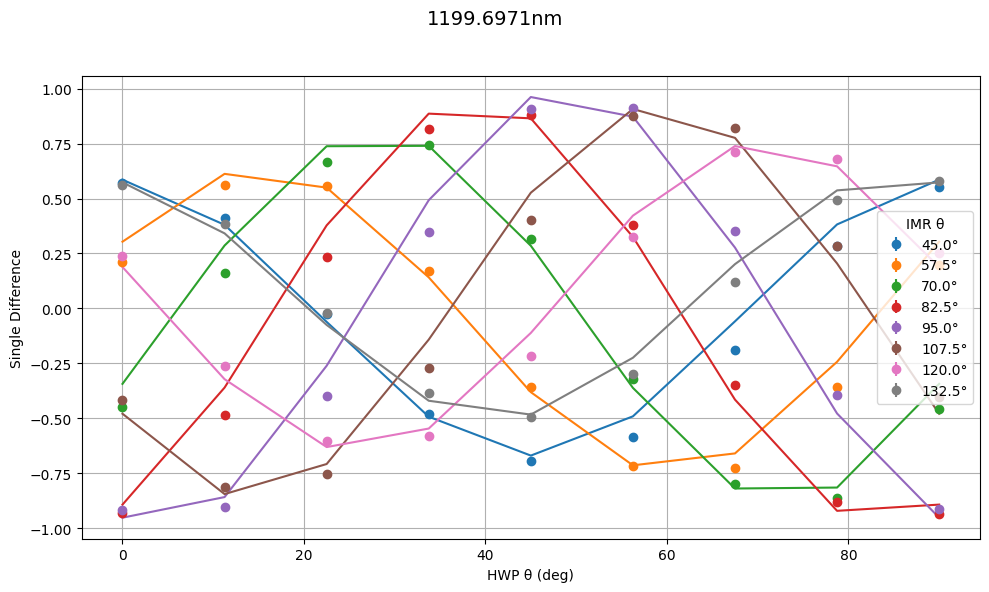

Updated Mueller Matrix:
[[ 0.39340737  0.39340713 -0.00043257  0.        ]
 [-0.39340737 -0.39340713  0.00043257  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14526622862826666 0.08298202771491753
Error: [ 0.02076256  0.83097308  0.02170052  5.53242622 10.73216683]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.422e+02 -5.602e+01 ...  2.593e+02  3.277e+00]
           x: [ 3.871e+00 -1.062e-02  3.044e+00 -2.200e-03 -3.150e-02]
        cost: 4358397.374546129
         jac: [[-3.368e+03  5.177e-01 ... -1.193e+01  1.169e+01]
               [-2.056e+03  1.773e+02 ... -1.601e+02  8.435e+01]
               ...
               [-2.109e+03 -1.517e+02 ...  1.156e+02 -5.330e+01]
               [-3.426e+03  5.531e+01 ... -6.683e+01  3.920e+01]]
        grad: [ 1.010e+00 -3.919e+06 -2.357e+00  4.063e+06 -2.036e+06]
  optimality: 0.5520975254750788
 

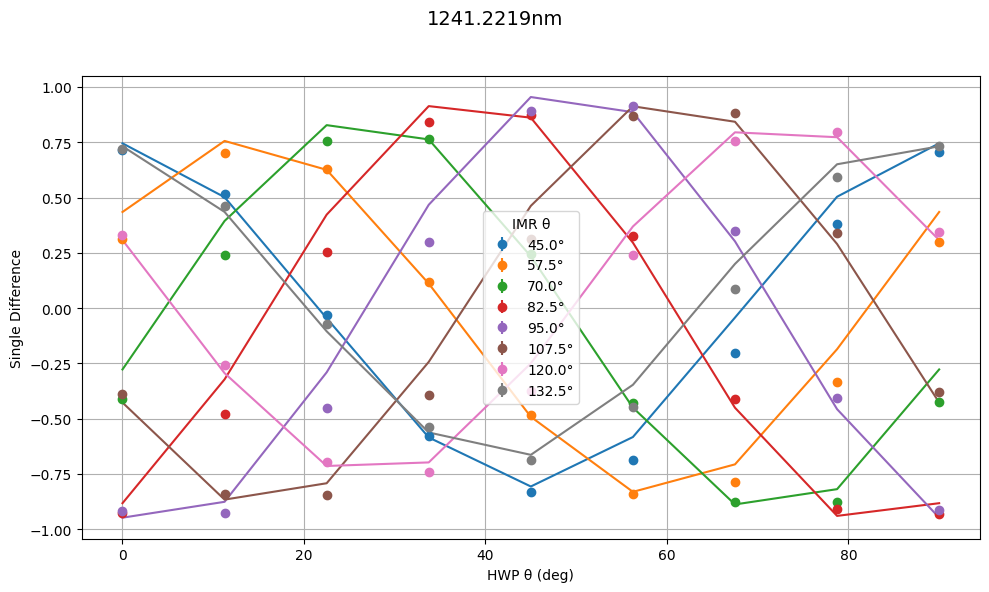

Updated Mueller Matrix:
[[ 0.43293842  0.43293815 -0.00047604  0.        ]
 [-0.43293842 -0.43293815  0.00047604  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16904934968048774 0.049376858516500255
Error: [ 0.02560656  1.38664239  0.02717302  8.05031707 15.41439915]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.367e+02 -1.501e+02 ...  3.483e+02 -5.692e+01]
           x: [ 3.639e+00 -1.062e-02  3.079e+00 -2.200e-03 -3.150e-02]
        cost: 6071663.601117189
         jac: [[-3.675e+03  8.508e-01 ... -8.889e+00  8.479e+00]
               [-1.829e+03  2.367e+02 ... -2.264e+02  1.157e+02]
               ...
               [-1.829e+03 -1.993e+02 ...  1.785e+02 -8.669e+01]
               [-3.792e+03  9.204e+01 ... -1.003e+02  5.428e+01]]
        grad: [-4.014e-02 -5.762e+06 -6.776e+01  5.831e+06 -2.916e+06]
  optimality: 12.787321160561579


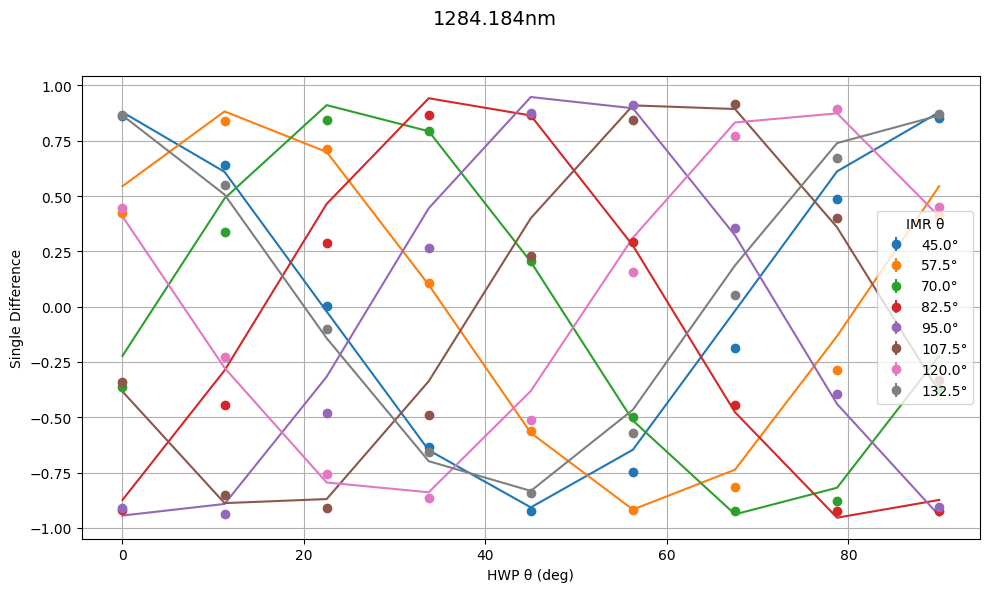

Updated Mueller Matrix:
[[ 0.46603703  0.46603675 -0.00051243  0.        ]
 [-0.46603703 -0.46603675  0.00051243  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1818605792992053 0.04990561225818324
Error: [3.04744832e-02 2.76142937e+00 3.42096742e-02 1.59957362e+01
 3.05913600e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 5.039e+01 -3.013e+02 ...  4.324e+02 -1.492e+02]
           x: [ 3.467e+00 -1.062e-02  3.193e+00 -2.200e-03 -3.150e-02]
        cost: 7617667.0709412955
         jac: [[-4.412e+03  1.583e+00 ...  6.415e+00 -7.195e+00]
               [-1.364e+03  3.172e+02 ... -3.052e+02  1.508e+02]
               ...
               [-1.703e+03 -2.519e+02 ...  2.469e+02 -1.252e+02]
               [-4.369e+03  1.642e+02 ... -1.562e+02  7.406e+01]]
        grad: [ 5.687e+00 -8.265e+06 -4.354e+01  8.254e+06 -4.126e+06]
  optimality: 2.79

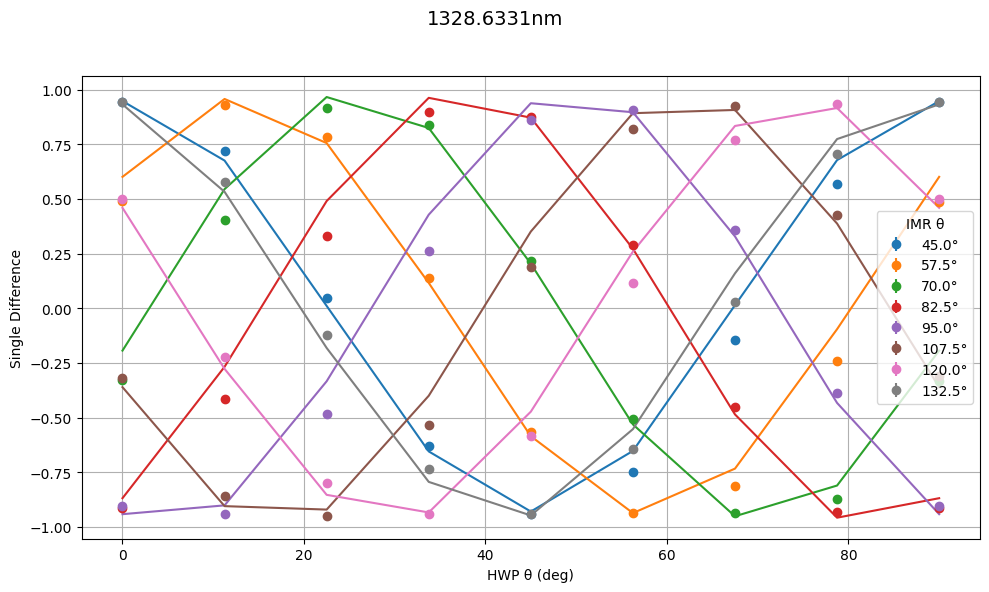

Updated Mueller Matrix:
[[ 0.48312369  0.48312339 -0.00053122  0.        ]
 [-0.48312369 -0.48312339  0.00053122  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16686930627230162 0.06090486521405292
Error: [3.39207688e-02 5.46629770e+00 4.19096444e-02 2.38118804e+01
 4.34643425e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 4.293e+02 -3.217e+02 ...  1.208e+03  5.011e+02]
           x: [ 2.707e+00 -1.062e-02  2.964e+00 -2.200e-03 -3.150e-02]
        cost: 33727824.55093001
         jac: [[ 9.009e+03  2.379e+00 ...  5.331e+01 -5.447e+01]
               [ 3.257e+03  6.428e+02 ... -5.784e+02  2.727e+02]
               ...
               [ 4.903e+03 -4.829e+02 ...  4.844e+02 -2.581e+02]
               [ 8.332e+03  2.326e+02 ... -1.791e+02  6.281e+01]]
        grad: [ 1.577e+07 -3.282e+07  7.863e-01  3.227e+07 -1.613e+07]
  optimality: 0.23

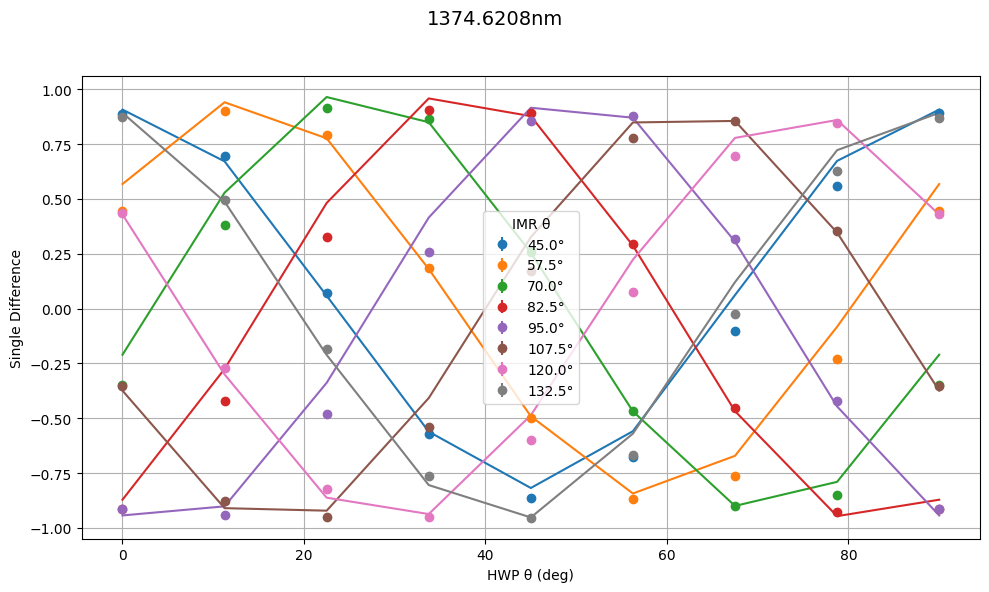

Updated Mueller Matrix:
[[ 0.4730492   0.47304891 -0.00052014  0.        ]
 [-0.4730492  -0.47304891  0.00052014  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16144482212979988 0.04085314936450457
Error: [ 0.03137008  3.05474904  0.03545594  8.39772371 12.77770747]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.845e+02 -5.048e+01 ...  8.332e+02  4.849e+02]
           x: [ 2.440e+00 -1.062e-02  2.941e+00 -2.200e-03 -3.150e-02]
        cost: 16060476.731403032
         jac: [[ 6.512e+03  1.035e+00 ...  4.435e+01 -4.483e+01]
               [ 3.401e+03  3.675e+02 ... -2.830e+02  1.238e+02]
               ...
               [ 4.359e+03 -2.754e+02 ...  2.622e+02 -1.478e+02]
               [ 6.165e+03  1.039e+02 ... -5.970e+01  7.804e+00]]
        grad: [ 9.283e+00 -1.249e+07  3.412e+00  1.206e+07 -6.027e+06]
  optimality: 0.9808766713367664


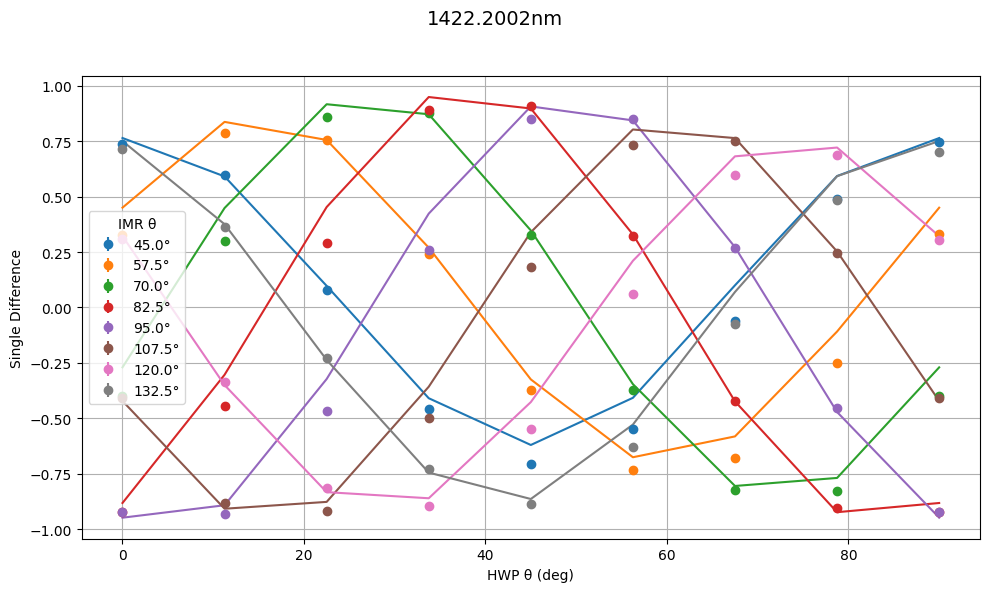

Updated Mueller Matrix:
[[ 0.43753094  0.43753067 -0.00048109  0.        ]
 [-0.43753094 -0.43753067  0.00048109  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16441290056830837 0.025504048476506558
Error: [0.02562815 1.43674756 0.02728081 4.79148145 8.12521312]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.263e+02  5.193e+01 ...  6.291e+02  4.656e+02]
           x: [ 2.169e+00 -1.062e-02  2.939e+00 -2.200e-03 -3.150e-02]
        cost: 10009873.995530188
         jac: [[ 6.587e+03  7.252e-01 ...  4.576e+01 -4.607e+01]
               [ 4.093e+03  2.887e+02 ... -1.676e+02  6.355e+01]
               ...
               [ 4.862e+03 -2.229e+02 ...  1.841e+02 -1.116e+02]
               [ 6.379e+03  7.444e+01 ... -2.849e+01 -8.673e+00]]
        grad: [ 1.435e+01 -8.180e+06  3.158e+01  8.206e+06 -4.121e+06]
  optimality: 9.111735263550539
 acti

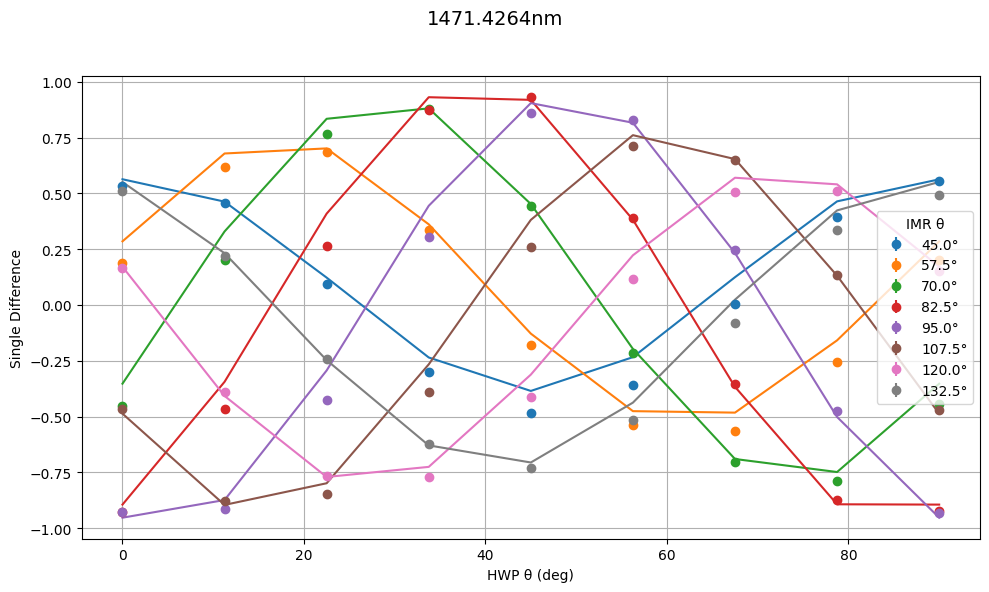

Updated Mueller Matrix:
[[ 0.38786391  0.38786368 -0.00042648  0.        ]
 [-0.38786391 -0.38786368  0.00042648  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14379259769952107 0.028252923268713703
Error: [0.01883397 0.72366057 0.01964971 2.94370603 5.34350144]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.418e+02  2.025e+02 ...  5.192e+02  4.884e+02]
           x: [ 1.925e+00 -1.062e-02  2.937e+00 -2.200e-03 -3.150e-02]
        cost: 8126304.482670692
         jac: [[ 6.375e+03  5.325e-01 ...  4.476e+01 -4.496e+01]
               [ 4.287e+03  2.214e+02 ... -7.292e+01  1.586e+01]
               ...
               [ 4.910e+03 -1.762e+02 ...  1.107e+02 -7.575e+01]
               [ 6.273e+03  5.556e+01 ... -1.023e+01 -1.747e+01]]
        grad: [ 8.763e+01 -4.988e+06  3.025e+02  5.616e+06 -2.831e+06]
  optimality: 87.36754921702021
 activ

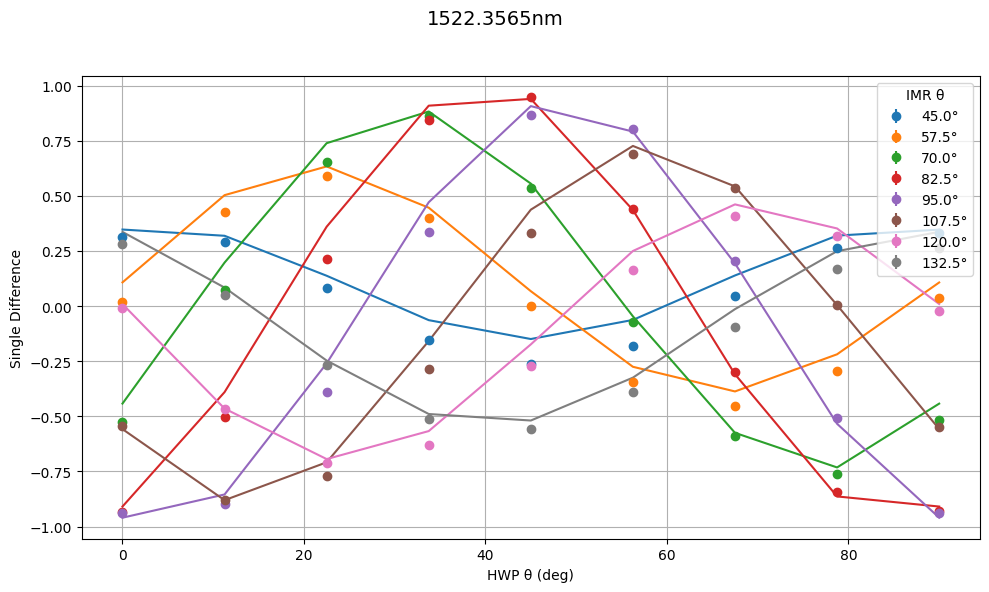

Updated Mueller Matrix:
[[ 0.33417921  0.334179   -0.00036745  0.        ]
 [-0.33417921 -0.334179    0.00036745  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14434851226679224 0.027407323450848398
Error: [0.01685988 0.51649812 0.01748837 2.40394437 4.51625752]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.451e+02  3.254e+02 ...  4.378e+02  5.045e+02]
           x: [ 1.716e+00 -1.062e-02  2.940e+00 -2.200e-03 -3.150e-02]
        cost: 9115503.380685002
         jac: [[ 7.187e+03  4.837e-01 ...  5.000e+01 -5.014e+01]
               [ 5.005e+03  2.030e+02 ... -5.067e+00 -2.063e+01]
               ...
               [ 5.573e+03 -1.651e+02 ...  5.884e+01 -5.276e+01]
               [ 7.153e+03  5.103e+01 ... -6.921e-02 -2.534e+01]]
        grad: [ 7.481e+00 -4.444e+06  2.799e+01  6.527e+06 -3.288e+06]
  optimality: 8.13836789256898
 active

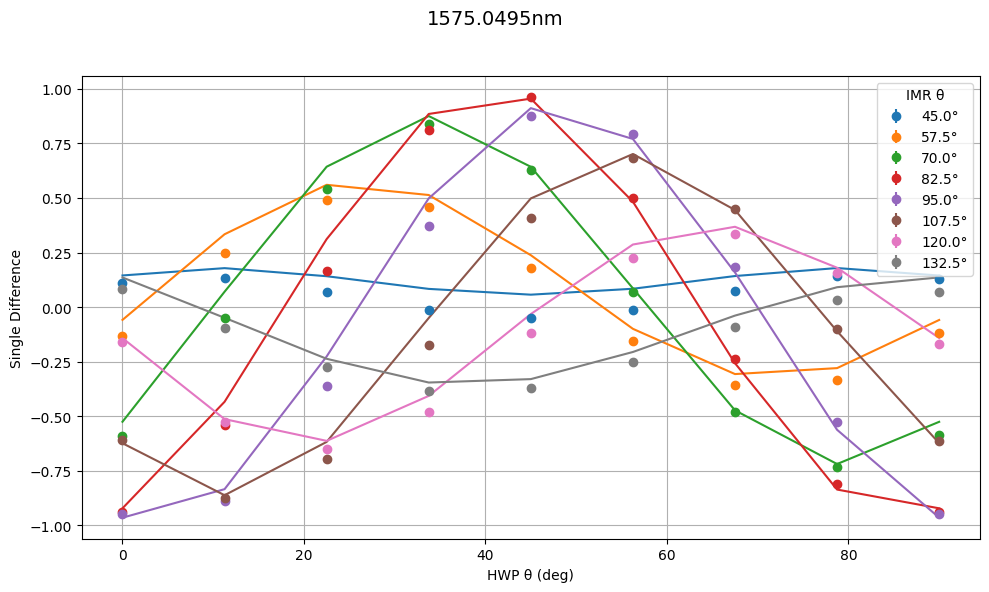

Updated Mueller Matrix:
[[ 0.28397778  0.28397761 -0.00031225  0.        ]
 [-0.28397778 -0.28397761  0.00031225  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14655044380935212 0.03441007950687536
Error: [0.01566599 0.42954702 0.01637556 2.15189222 4.12437959]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.308e+02  4.479e+02 ...  3.053e+02  4.975e+02]
           x: [ 1.521e+00 -1.062e-02  2.948e+00 -2.200e-03 -3.150e-02]
        cost: 10153980.566274732
         jac: [[ 8.310e+03  4.606e-01 ...  5.552e+01 -5.561e+01]
               [ 5.876e+03  1.922e+02 ...  7.087e+01 -6.095e+01]
               ...
               [ 6.363e+03 -1.586e+02 ... -5.554e+00 -2.320e+01]
               [ 8.338e+03  4.894e+01 ...  7.904e+00 -3.223e+01]]
        grad: [ 9.547e+00 -3.930e+06  4.422e+01  8.914e+06 -4.517e+06]
  optimality: 13.102018732870876
 acti

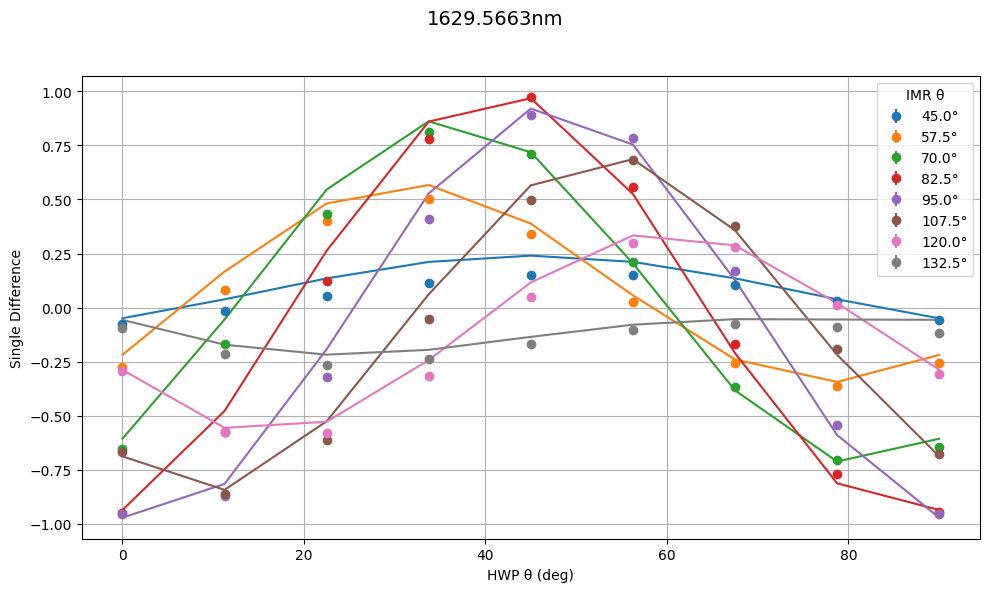

Updated Mueller Matrix:
[[ 0.23585359  0.23585344 -0.00025933  0.        ]
 [-0.23585359 -0.23585344  0.00025933  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14075214816186993 0.04821776039892367
Error: [0.01428658 0.38193507 0.01513022 1.99433222 3.87664754]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.266e+02  5.540e+02 ...  1.801e+02  4.562e+02]
           x: [ 1.361e+00 -1.062e-02  2.958e+00 -2.200e-03 -3.150e-02]
        cost: 10720075.748548476
         jac: [[ 8.348e+03  3.939e-01 ...  5.302e+01 -5.305e+01]
               [ 5.907e+03  1.620e+02 ...  1.331e+02 -9.050e+01]
               ...
               [ 6.231e+03 -1.344e+02 ... -6.911e+01  1.010e+01]
               [ 8.422e+03  4.204e+01 ...  1.241e+01 -3.326e+01]]
        grad: [-9.520e+01 -2.659e+06 -4.299e+02  9.676e+06 -4.894e+06]
  optimality: 124.60099622879369
 acti

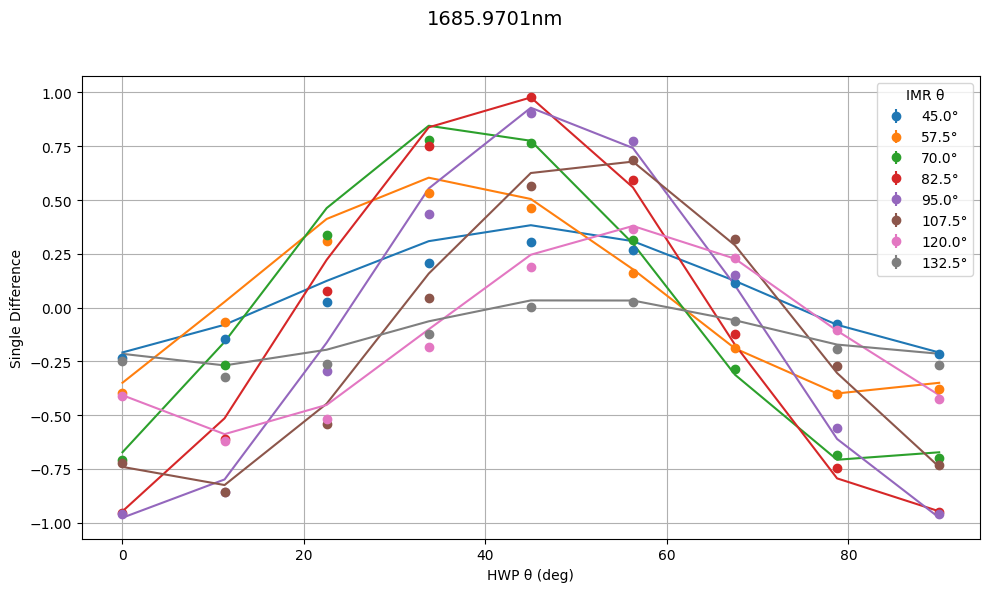

Updated Mueller Matrix:
[[ 0.19640344  0.19640332 -0.00021596  0.        ]
 [-0.19640344 -0.19640332  0.00021596  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14268074489463045 0.05133704766895231
Error: [0.01470089 0.40641359 0.01583898 2.13088994 4.17805492]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 2.449e+02  6.790e+02 ...  8.259e+01  4.327e+02]
           x: [ 1.246e+00 -1.062e-02  2.970e+00 -2.200e-03 -3.150e-02]
        cost: 13461518.539017685
         jac: [[ 8.674e+03  3.638e-01 ...  5.169e+01 -5.167e+01]
               [ 6.099e+03  1.473e+02 ...  1.837e+02 -1.148e+02]
               ...
               [ 6.289e+03 -1.219e+02 ... -1.213e+02  3.733e+01]
               [ 8.766e+03  3.884e+01 ...  1.426e+01 -3.348e+01]]
        grad: [-1.867e+01 -2.281e+06 -9.893e+01  1.175e+07 -5.912e+06]
  optimality: 28.52241381734502
 activ

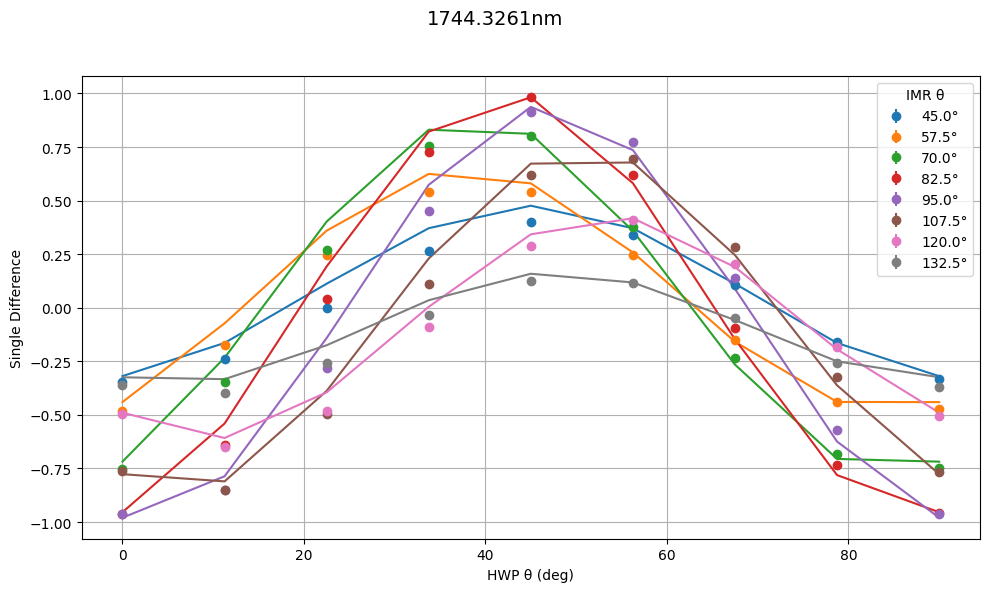

Updated Mueller Matrix:
[[ 0.16894125  0.16894115 -0.00018576  0.        ]
 [-0.16894125 -0.16894115  0.00018576  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.15101701815308274 0.054179404723254
Error: [0.01599012 0.46588143 0.01752568 2.45020464 4.8300358 ]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 5.307e+02  1.330e+03 ...  1.441e+02  7.502e+02]
           x: [ 1.148e+00 -1.062e-02  2.980e+00 -2.200e-03 -3.150e-02]
        cost: 41469562.0418984
         jac: [[ 1.313e+04  4.958e-01 ...  7.400e+01 -7.392e+01]
               [ 9.114e+03  1.966e+02 ...  3.380e+02 -2.012e+02]
               ...
               [ 9.193e+03 -1.618e+02 ... -2.480e+02  9.157e+01]
               [ 1.331e+04  5.305e+01 ...  2.310e+01 -4.928e+01]]
        grad: [-2.200e+02 -4.414e+06 -1.093e+03  2.985e+07 -1.500e+07]
  optimality: 319.73199441517517
 active_m

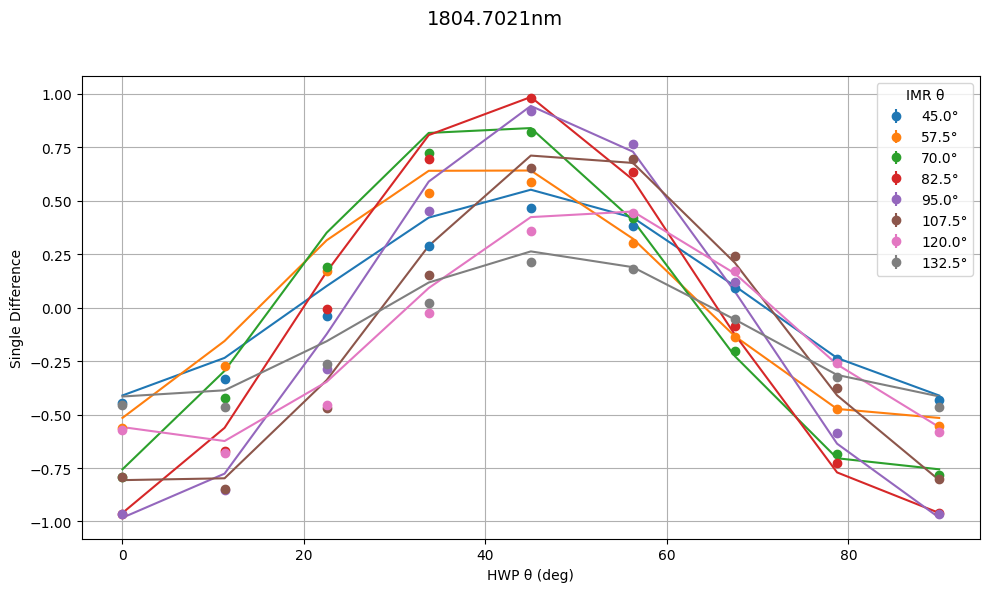

Updated Mueller Matrix:
[[ 0.14622405  0.14622397 -0.00016078  0.        ]
 [-0.14622405 -0.14622397  0.00016078  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.17319304001071018 0.04943755825219853
Error: [0.01888627 0.58680621 0.02121416 3.03333145 6.00033935]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.869e+02  1.991e+03 ... -1.080e+03  5.395e+01]
           x: [ 1.035e+00 -1.062e-02  3.007e+00 -2.200e-03 -3.150e-02]
        cost: 188849567.50524133
         jac: [[ 2.862e+04  9.546e-01 ...  1.349e+02 -1.345e+02]
               [ 1.966e+04  3.734e+02 ...  8.925e+02 -5.039e+02]
               ...
               [ 1.945e+04 -3.034e+02 ... -7.271e+02  3.062e+02]
               [ 2.894e+04  1.016e+02 ...  3.671e+01 -8.668e+01]]
        grad: [-6.303e+08 -1.585e+07 -1.255e+02  1.644e+08 -8.226e+07]
  optimality: 35.53845445580032
 activ

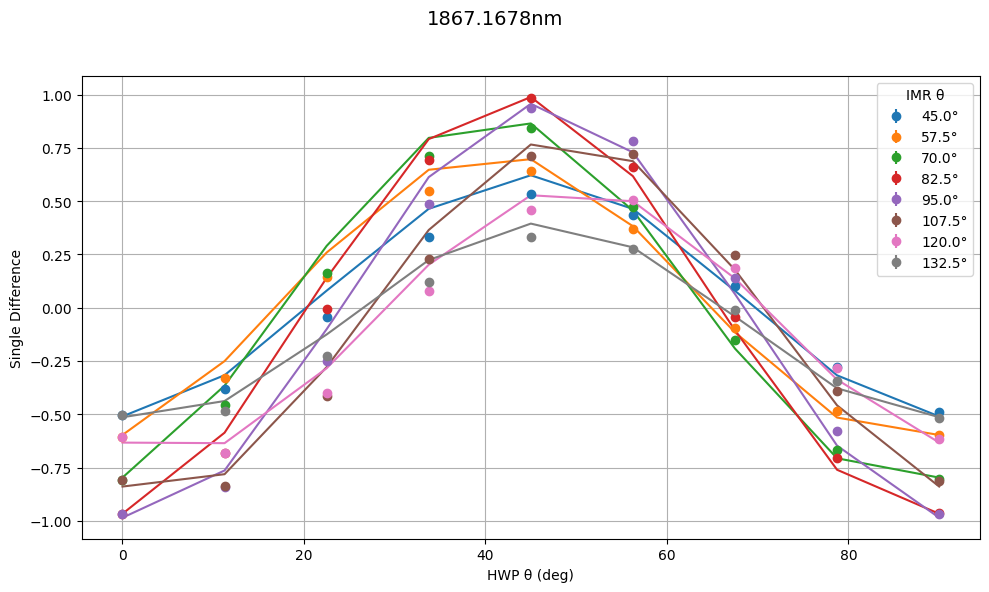

Updated Mueller Matrix:
[[ 0.12151246  0.12151239 -0.00013361  0.        ]
 [-0.12151246 -0.12151239  0.00013361  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.15068355029916042 0.07386271252373508
Error: [0.01855521 0.63633597 0.02090988 3.5957747  7.14754957]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.447e+03  2.658e+02 ... -2.018e+03 -1.430e+03]
           x: [ 9.474e-01 -1.062e-02  3.034e+00 -2.200e-03 -3.150e-02]
        cost: 103777034.58373123
         jac: [[ 1.910e+04  5.745e-01 ...  7.206e+01 -7.174e+01]
               [ 1.301e+04  2.233e+02 ...  6.869e+02 -3.739e+02]
               ...
               [ 1.277e+04 -1.792e+02 ... -5.957e+02  2.679e+02]
               [ 1.920e+04  6.071e+01 ...  1.279e+01 -4.252e+01]]
        grad: [-6.520e+08 -5.527e+06 -2.105e+01  8.670e+07 -4.324e+07]
  optimality: 5.848017518002091
 activ

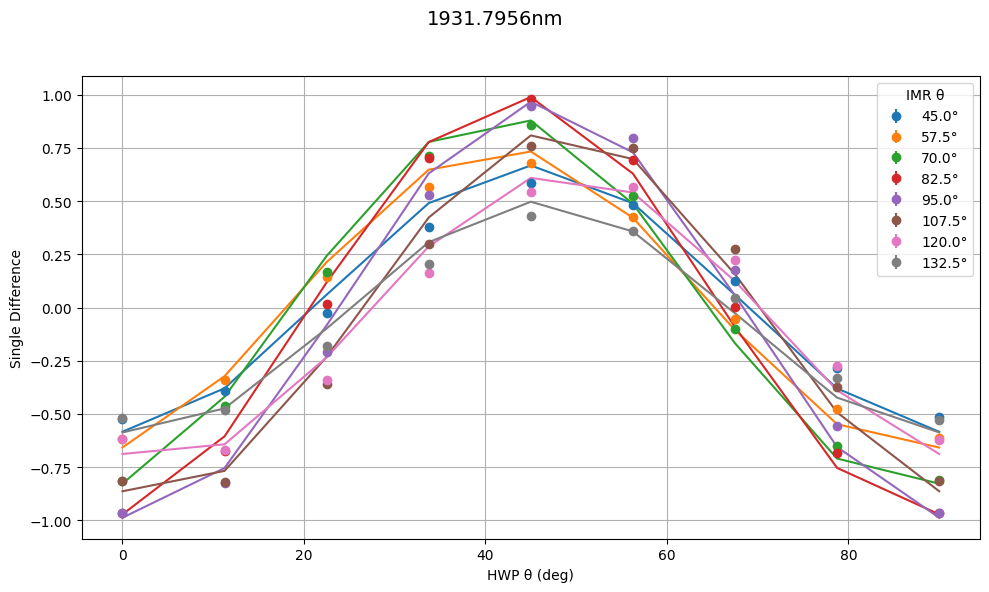

Updated Mueller Matrix:
[[ 0.10326443  0.10326436 -0.00011355  0.        ]
 [-0.10326443 -0.10326436  0.00011355  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12677040860323302 0.11952172154779622
Error: [ 0.02037068  0.77145618  0.02269798  5.03801898 10.04380937]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.682e+03  9.196e+01 ... -2.082e+03 -1.783e+03]
           x: [ 8.833e-01 -1.062e-02  3.056e+00 -2.200e-03 -3.150e-02]
        cost: 102997982.22613415
         jac: [[ 1.615e+04  4.483e-01 ...  4.879e+01 -4.846e+01]
               [ 1.090e+04  1.734e+02 ...  6.425e+02 -3.417e+02]
               ...
               [ 1.062e+04 -1.370e+02 ... -5.741e+02  2.673e+02]
               [ 1.616e+04  4.713e+01 ...  2.439e+00 -2.544e+01]]
        grad: [-6.542e+08 -3.967e+06 -6.274e+01  6.940e+07 -3.457e+07]
  optimality: 17.71087456324182
 

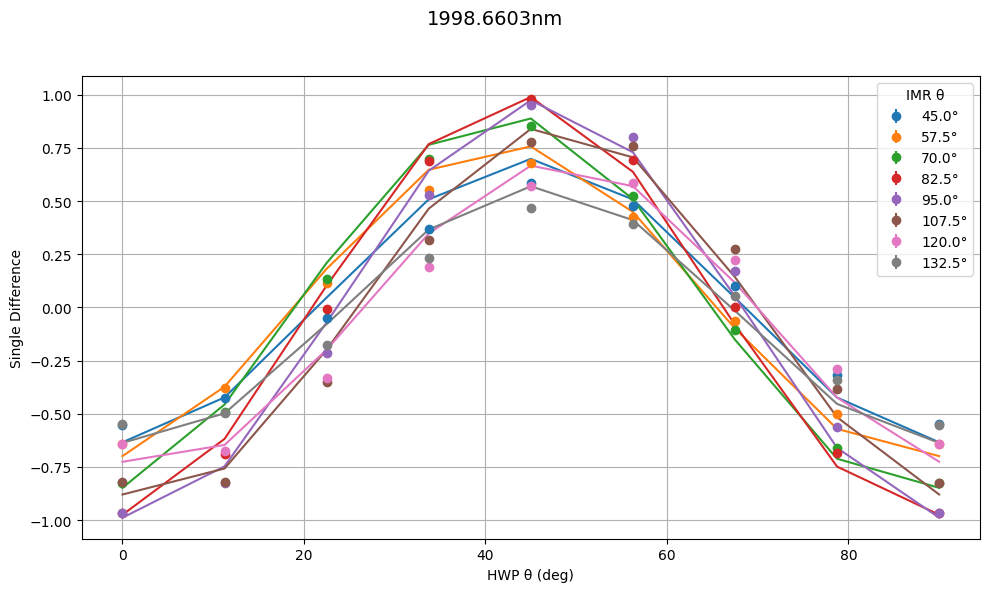

Updated Mueller Matrix:
[[ 9.06649527e-02  9.06648979e-02 -9.96913022e-05  0.00000000e+00]
 [-9.06649527e-02 -9.06648979e-02  9.96913022e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.15802413266378004 0.13632917412234097
Error: [ 0.02424425  0.98550062  0.0272796   7.49225186 14.95871773]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.050e+03 -2.879e+02 ... -2.404e+03 -2.262e+03]
           x: [ 8.399e-01 -1.062e-02  3.090e+00 -2.200e-03 -3.150e-02]
        cost: 111111999.49425231
         jac: [[ 1.466e+04  3.852e-01 ...  2.714e+01 -2.679e+01]
               [ 9.778e+03  1.490e+02 ...  6.201e+02 -3.213e+02]
               ...
               [ 9.665e+03 -1.162e+02 ... -5.776e+02  2.780e+02]
               [ 1.460e+04  4.020e+01 ... -1.266e+01 -6.898e+00]]
        grad: [-6.906e+08 -3.257e+06 -3.

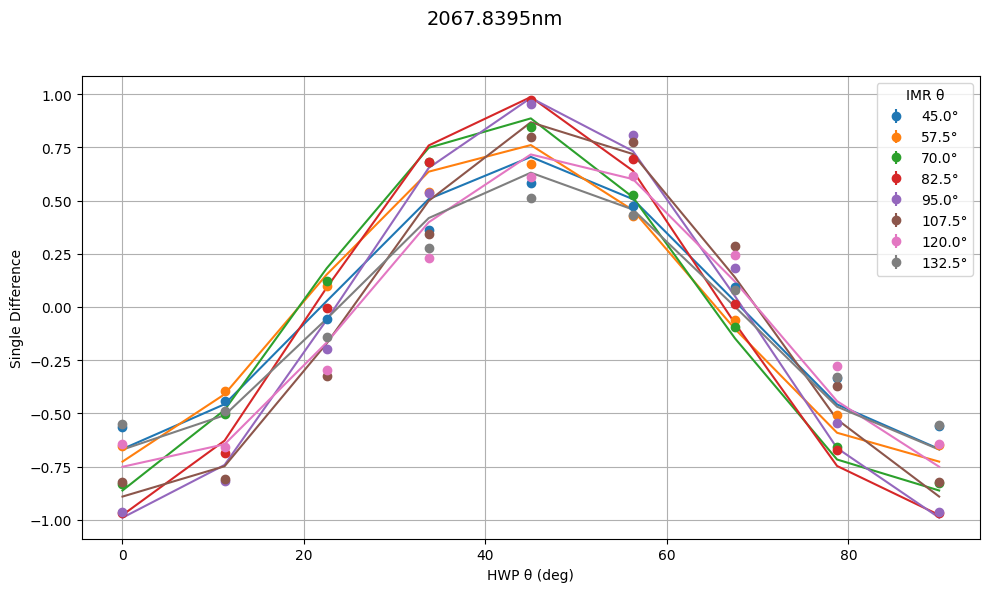

Updated Mueller Matrix:
[[ 8.24886457e-02  8.24885958e-02 -9.07009849e-05  0.00000000e+00]
 [-8.24886457e-02 -8.24885958e-02  9.07009849e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.16571301331456662 0.16472016343457935
Error: [2.76836700e-02 1.19751867e+00 3.10795108e-02 1.42457507e+01
 2.84760707e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.031e+03 -4.403e+02 ... -2.309e+03 -2.310e+03]
           x: [ 8.140e-01 -1.062e-02  3.131e+00 -2.200e-03 -3.150e-02]
        cost: 98124716.65505105
         jac: [[ 1.273e+04  3.233e-01 ...  5.488e+00 -5.162e+00]
               [ 8.341e+03  1.252e+02 ...  5.521e+02 -2.781e+02]
               ...
               [ 8.469e+03 -9.608e+01 ... -5.375e+02  2.668e+02]
               [ 1.262e+04  3.356e+01 ... -2.777e+01  1.148e+01]]
        grad: [-5.963e+08

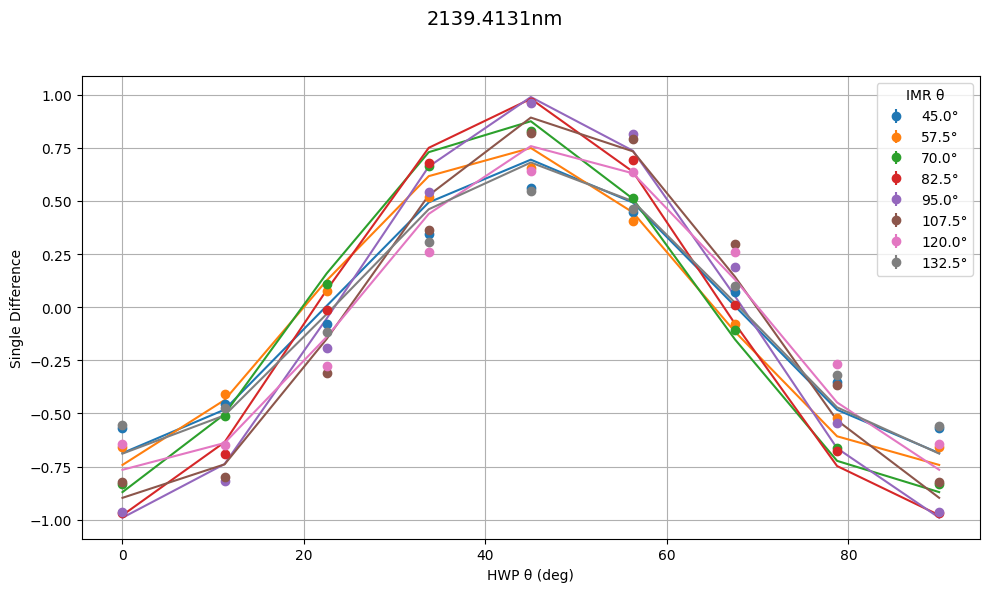

Updated Mueller Matrix:
[[ 7.77539526e-02  7.77539056e-02 -8.54949190e-05  0.00000000e+00]
 [-7.77539526e-02 -7.77539056e-02  8.54949190e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.17871714262370275 0.17925379387698198
Error: [3.00340697e-02 1.34397453e+00 3.37400314e-02 7.34075417e+01
 1.46813425e+02]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.384e+03 -9.654e+02 ... -2.642e+03 -2.709e+03]
           x: [ 8.003e-01 -1.062e-02  3.171e+00 -2.200e-03 -3.150e-02]
        cost: 99312737.87644011
         jac: [[ 1.110e+04  2.765e-01 ... -1.080e+01  1.109e+01]
               [ 7.218e+03  1.085e+02 ...  4.879e+02 -2.390e+02]
               ...
               [ 7.623e+03 -8.275e+01 ... -4.996e+02  2.544e+02]
               [ 1.096e+04  2.860e+01 ... -3.903e+01  2.516e+01]]
        grad: [-5.636e+08

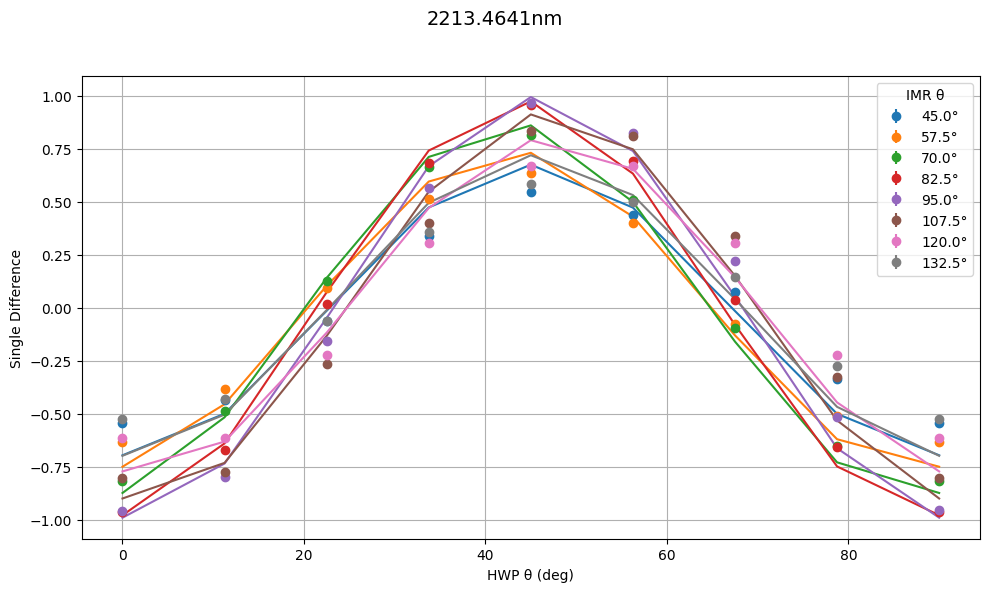

Updated Mueller Matrix:
[[ 7.52843820e-02  7.52843365e-02 -8.27794849e-05  0.00000000e+00]
 [-7.52843820e-02 -7.52843365e-02  8.27794849e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.1640730558104322 0.223663009944143
Error: [3.40559455e-02 1.57268325e+00 3.76150579e-02 3.13713930e+01
 6.27302988e+01]
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.910e+03 -7.093e+02 ... -2.011e+03 -2.230e+03]
           x: [ 8.026e-01 -1.062e-02  3.232e+00 -2.200e-03 -3.150e-02]
        cost: 73538358.10750017
         jac: [[ 9.699e+03  2.416e-01 ... -3.018e+01  3.043e+01]
               [ 6.141e+03  9.550e+01 ...  4.079e+02 -1.906e+02]
               ...
               [ 6.800e+03 -7.115e+01 ... -4.471e+02  2.359e+02]
               [ 9.572e+03  2.505e+01 ... -5.466e+01  4.251e+01]]
        grad: [-4.255e+08 -1

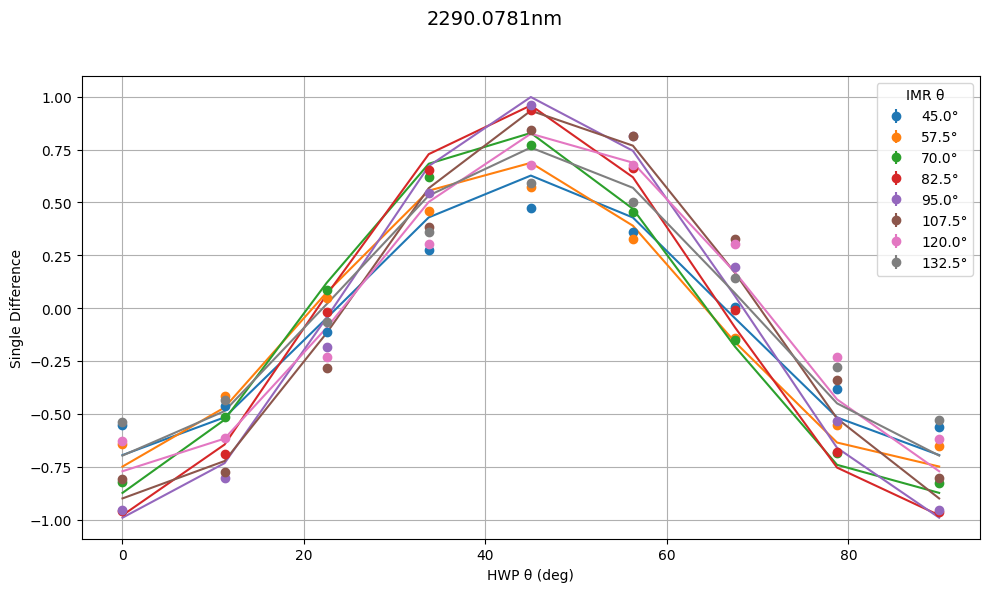

Updated Mueller Matrix:
[[ 7.56823757e-02  7.56823300e-02 -8.32171017e-05  0.00000000e+00]
 [-7.56823757e-02 -7.56823300e-02  8.32171017e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.20088029321988315 0.20174360117643245
Error: [ 0.03424171  1.5686916   0.03847499 10.06390393 20.09207292]
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-2.627e+03 -1.658e+03 ... -2.930e+03 -2.934e+03]
           x: [ 8.154e-01 -1.062e-02  3.247e+00 -2.200e-03 -3.150e-02]
        cost: 96804046.00735323
         jac: [[ 7.461e+03  1.893e-01 ... -2.710e+01  2.729e+01]
               [ 4.838e+03  7.702e+01 ...  3.110e+02 -1.432e+02]
               ...
               [ 5.586e+03 -5.898e+01 ... -3.601e+02  1.918e+02]
               [ 7.347e+03  1.957e+01 ... -4.612e+01  3.661e+01]]
        grad: [-3.564e+08 -1.595e+06  1.2

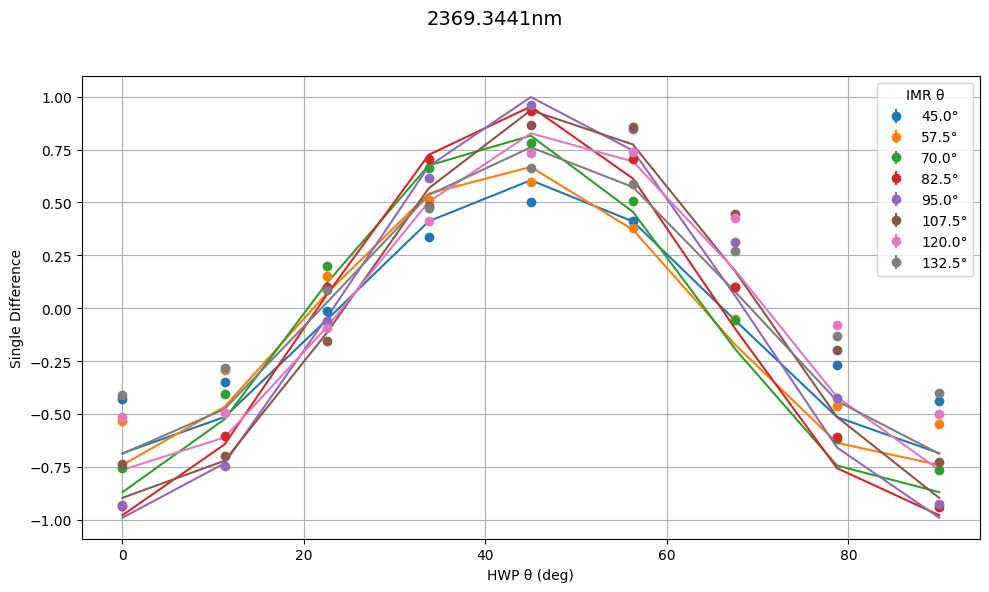

Updated Mueller Matrix:
[[ 7.79733357e-02  7.79732886e-02 -8.57361432e-05  0.00000000e+00]
 [-7.79733357e-02 -7.79732886e-02  8.57361432e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.10150382758105037 0.34280985269670367
Error: [ 0.04739071  2.21344385  0.05010812 12.81343026 25.56840667]


In [6]:
# Fit all 22 wavelength bins
errors = []
for bin in range(0,22):
    error = fit_CHARIS_Mueller_matrix_by_bin(
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin{bin}_no_pickoff.csv'),
        bin,
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff/sysdictbin{bin}nopick.json'),
        plot_path=Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff/bin{bin}nopick.png')
    )
    errors.append(error)
